# Project 3: Poisonous mushrooms

## PLEASE RUN IN PYTHON 3 KERNEL

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm


Load feature names.

In [2]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [4]:
def P1():
    ### STUDENT START ###
    
    #run PCA on train data with 50 principle components
    pca_mod = PCA(n_components = 50)
    pca_mod.fit(train_data)
    
    #find the cumulative sum of explained variance ratios up to each component
    #create table of components and corresponding cumulative total variance ratios
    results = np.array([np.linspace(1, 50, 50).astype(dtype = 'int64'), np.cumsum(pca_mod.explained_variance_ratio_)])
    results_t = pd.DataFrame(results).T
    
    
    results_t.columns = ["Principle Components", "Fraction of Total Variance Explained"]
    return results_t 
    ### STUDENT END ###
P1()

Principle Components  Fraction of Total Variance Explained
0                    1.0                              0.164043
1                    2.0                              0.297278
2                    3.0                              0.399013
3                    4.0                              0.469646
4                    5.0                              0.508313
5                    6.0                              0.545121
6                    7.0                              0.576403
7                    8.0                              0.603741
8                    9.0                              0.629905
9                   10.0                              0.652215
10                  11.0                              0.672697
11                  12.0                              0.691380
12                  13.0                              0.708724
13                  14.0                              0.725568
14                  15.0                              0.740756
15                  16.0                              0.755842
16                  17.0                              0.770133
17                  18.0                              0.784254
18                  19.0                              0.797504
19                  20.0                              0.808968
20                  21.0                              0.819678
21                  22.0                              0.830336
22                  23.0                              0.840746
23                  24.0                              0.850683
24                  25.0                              0.859763
25                  26.0                              0.868457
26                  27.0                              0.876413
27                  28.0                              0.884171
28                  29.0                              0.891547
29                  30.0                              0.898549
30                  31.0                              0.904962
31                  32.0                              0.911107
32                  33.0                              0.916830
33                  34.0                              0.922167
34                  35.0                              0.927426
35                  36.0                              0.932453
36                  37.0                              0.937443
37                  38.0                              0.942003
38                  39.0                              0.946530
39                  40.0                              0.950928
40                  41.0                              0.955123
41                  42.0                              0.959100
42                  43.0                              0.962801
43                  44.0                              0.966396
44                  45.0                              0.969777
45                  46.0                              0.972767
46                  47.0                              0.975487
47                  48.0                              0.977844
48                  49.0                              0.980058
49                  50.0                              0.982103

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

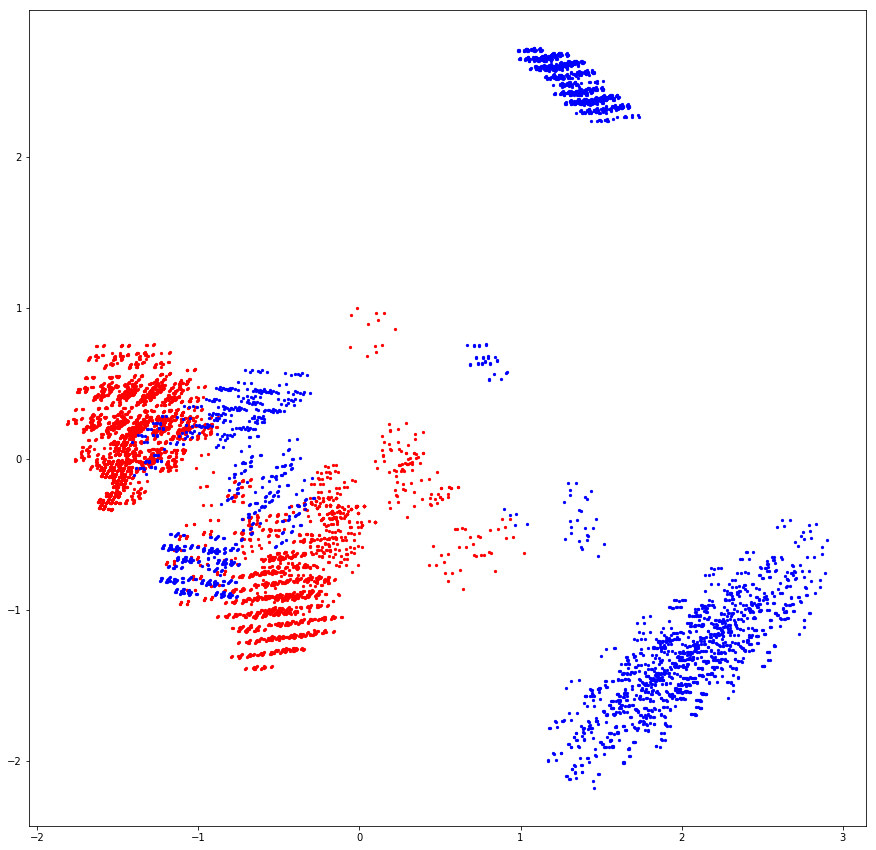

In [5]:
def P2():
    ### STUDENT START ###
    
    #transform training data by projecting to 2 dimensions
    pca_mod = PCA(n_components = 2)
    pca_mod.fit(train_data)
    
    transformed_train = pca_mod.transform(train_data)    
    return transformed_train

train_2D = P2()

#transpose the 2D data into 2 column array, then scatterplot the columns
#train_label = 1 represents poisonous, color coded blue
#train_label = 0 represents non-poisonous, color coded red
plt.figure(figsize=(15, 15))
train_2D_T = np.transpose(train_2D)
plt.scatter(train_2D_T[0][train_labels == 0], train_2D_T[1][train_labels == 0], s = 5, c = 'r')
plt.scatter(train_2D_T[0][train_labels == 1], train_2D_T[1][train_labels == 1], s = 5, c = 'b')

### STUDENT END ###

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

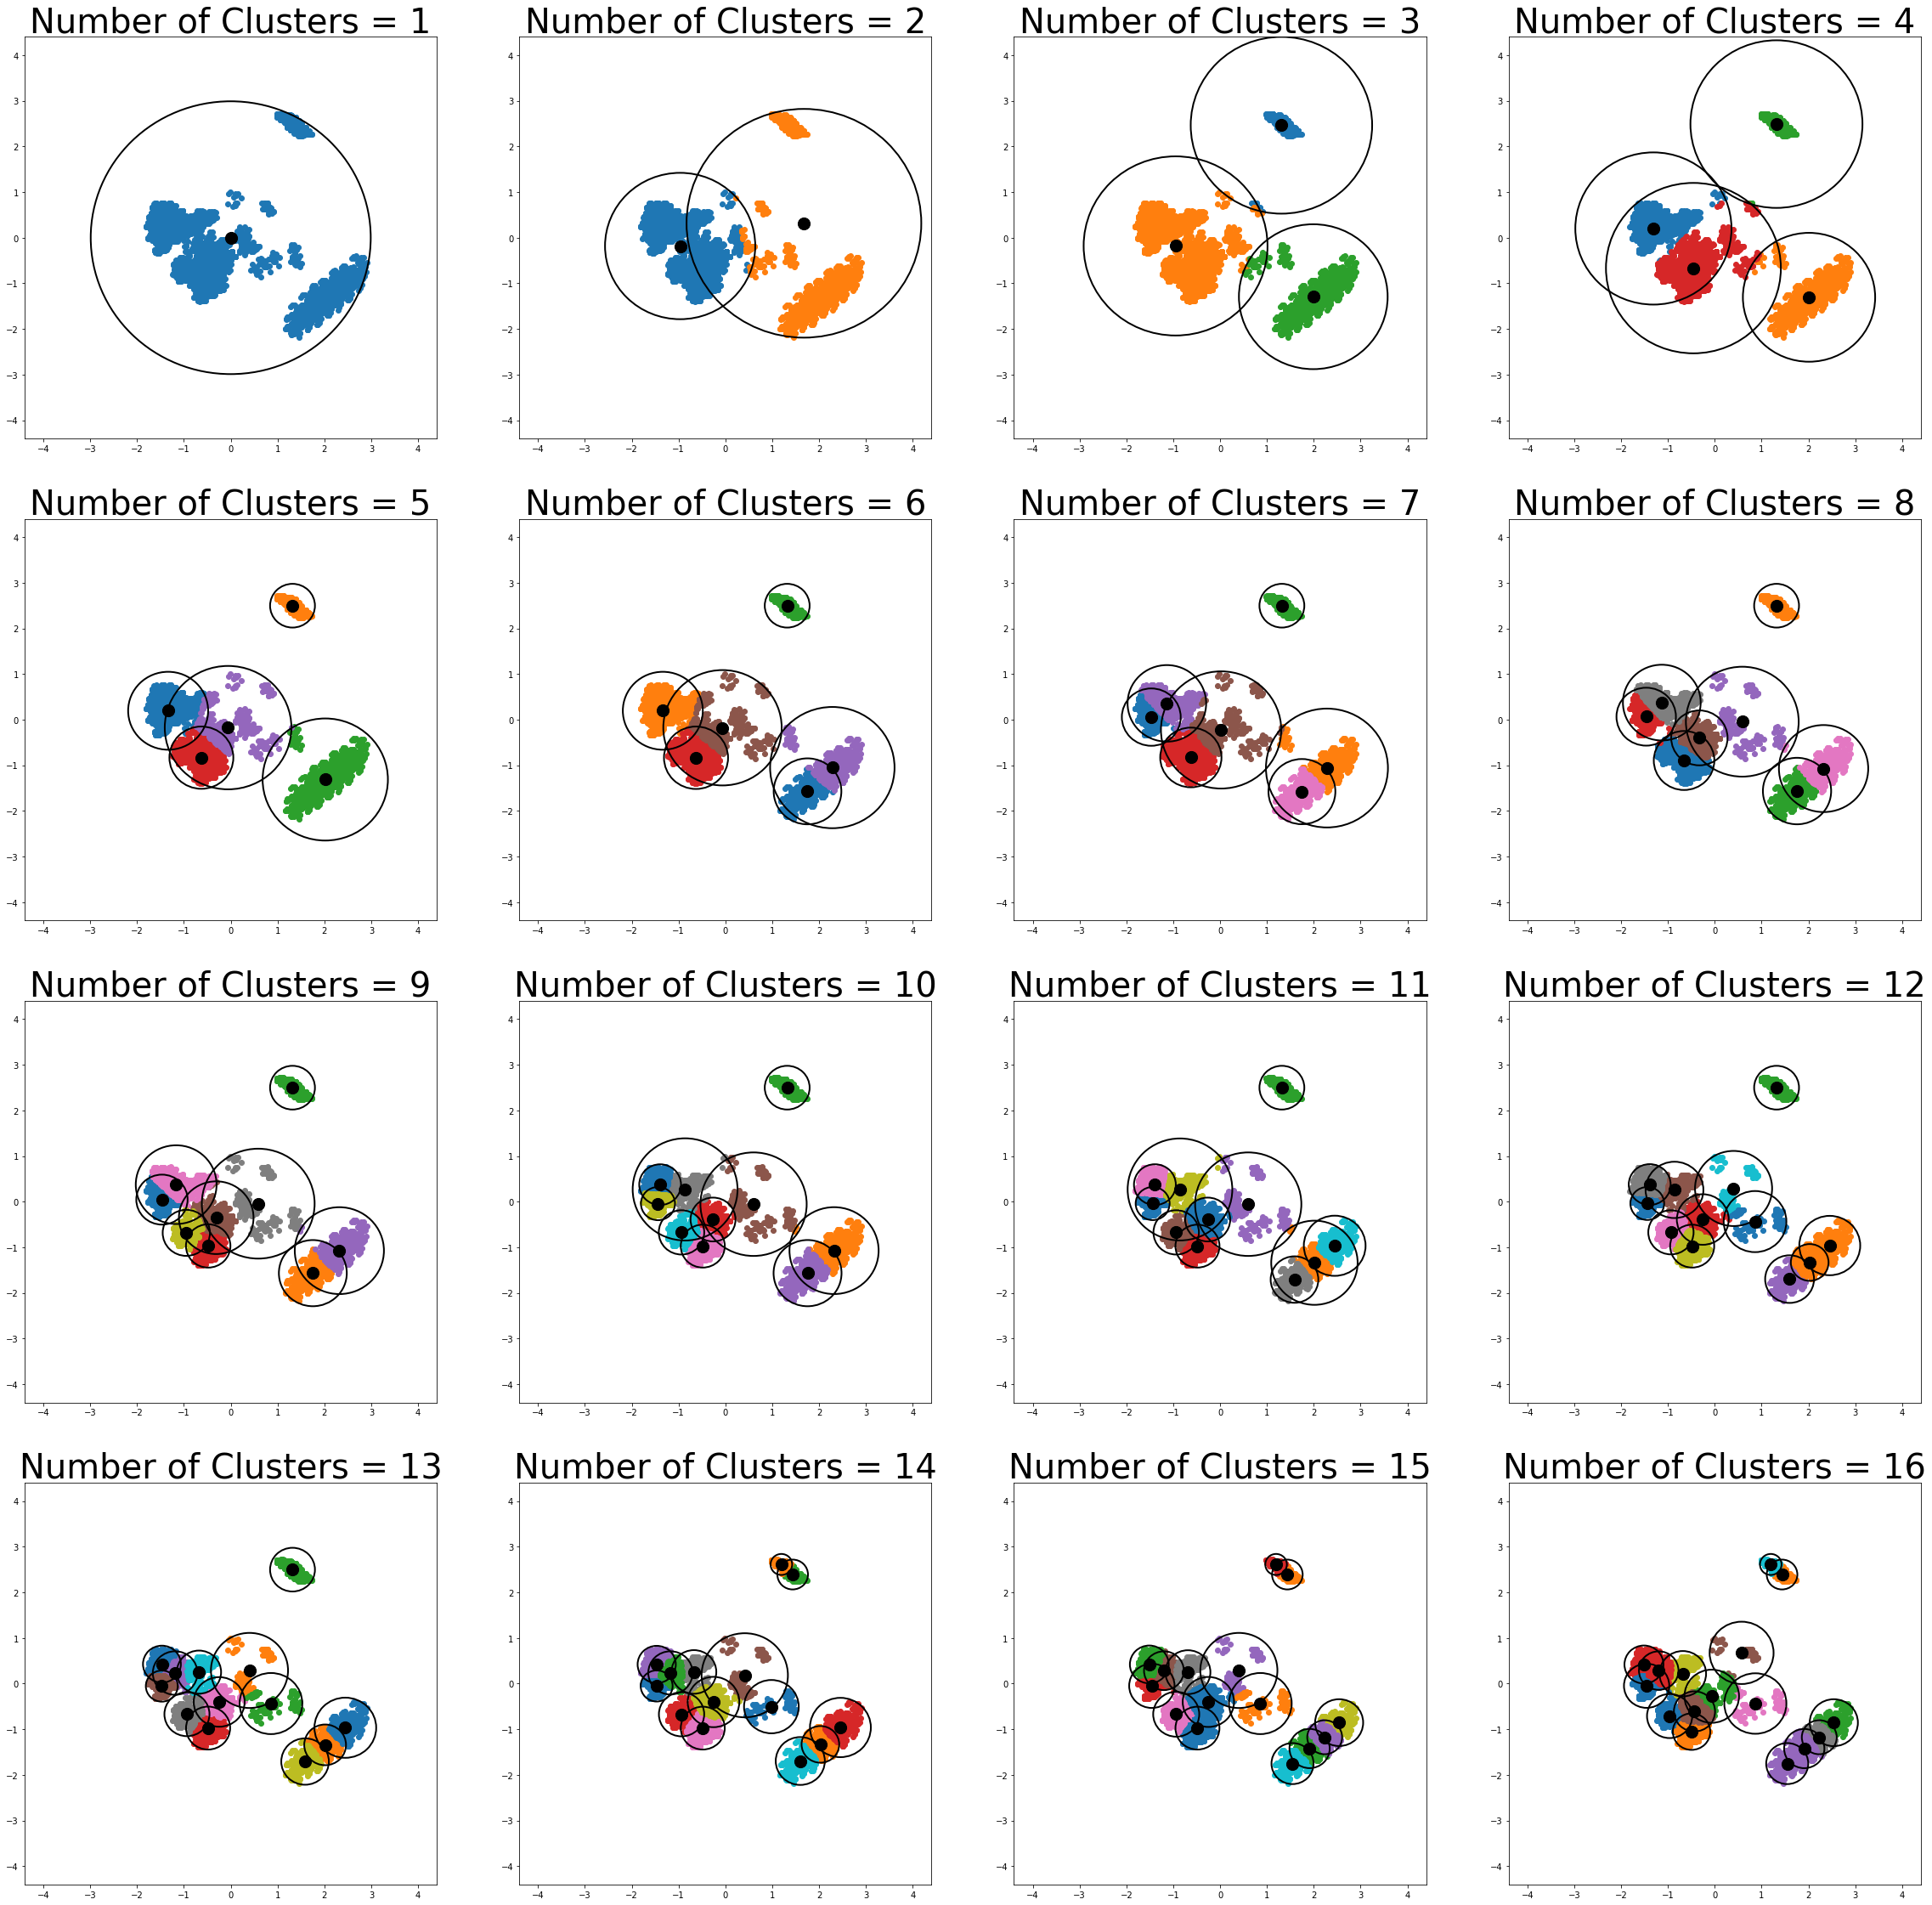

In [6]:
### STUDENT START ###
def distance(p, c):
    #calculate the euclidean distance of a point p from a center c
    distance = ((p[0]-c[0])**2+(p[1]-c[1])**2)**0.5
    return distance

def P3():
    #generate a list of cluster sizes
    clusters = np.linspace(1, 16, 16).astype(dtype = 'int64')
    
    #define size of figure
    plt.figure(figsize=(40, 40))
    
    for n in clusters:
        #for each cluster size, fit KMeans model on 2D_train data from #2
        km = KMeans(n_clusters=n, random_state = 42).fit(train_2D)
        #find the number of unique labels and the centroids that correspond to each label
        cluster_labels = set(list(km.labels_))
        centroids = km.cluster_centers_
        
        plt.subplot(4, 4, n)
        #set axis limits so that circles appear with proper aspect ratio
        plt.xlim(-4.4, 4.4)
        plt.ylim(-4.4, 4.4)
        #apply meaningful title to each subplot
        plt.title("Number of Clusters = "+str(n), fontsize=40)
        
        for cl in cluster_labels:
            #for each centroid
            #calculate the distance of all the points in its cluster to the centroid
            #set the raius radius to the maximum distance 
            r = np.amax(np.apply_along_axis(distance, 1, train_2D[km.labels_==cl], centroids[cl]))
            
            #plot the cluster as a scatter plot
            x = np.transpose(train_2D[km.labels_==cl])[0]
            y = np.transpose(train_2D[km.labels_==cl])[1]
            plt.scatter(x, y)
            
            #superimpose a black cicle on the scatter plot with radius 
            #equal to the max distance of points in the cluster
            circle = plt.Circle(centroids[cl], radius = r, color = 'k', linewidth=2, fill = False)
            plt.gcf().gca().add_artist(circle)
        
        #superimpose all centroids to the scatterplot as large black dots
        plt.scatter(np.transpose(centroids)[0], np.transpose(centroids)[1], s = 200, c = 'k')
        
### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

/Users/diliwang/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/Users/diliwang/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/Users/diliwang/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/Users/diliwang/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')
/Users/diliwang/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0

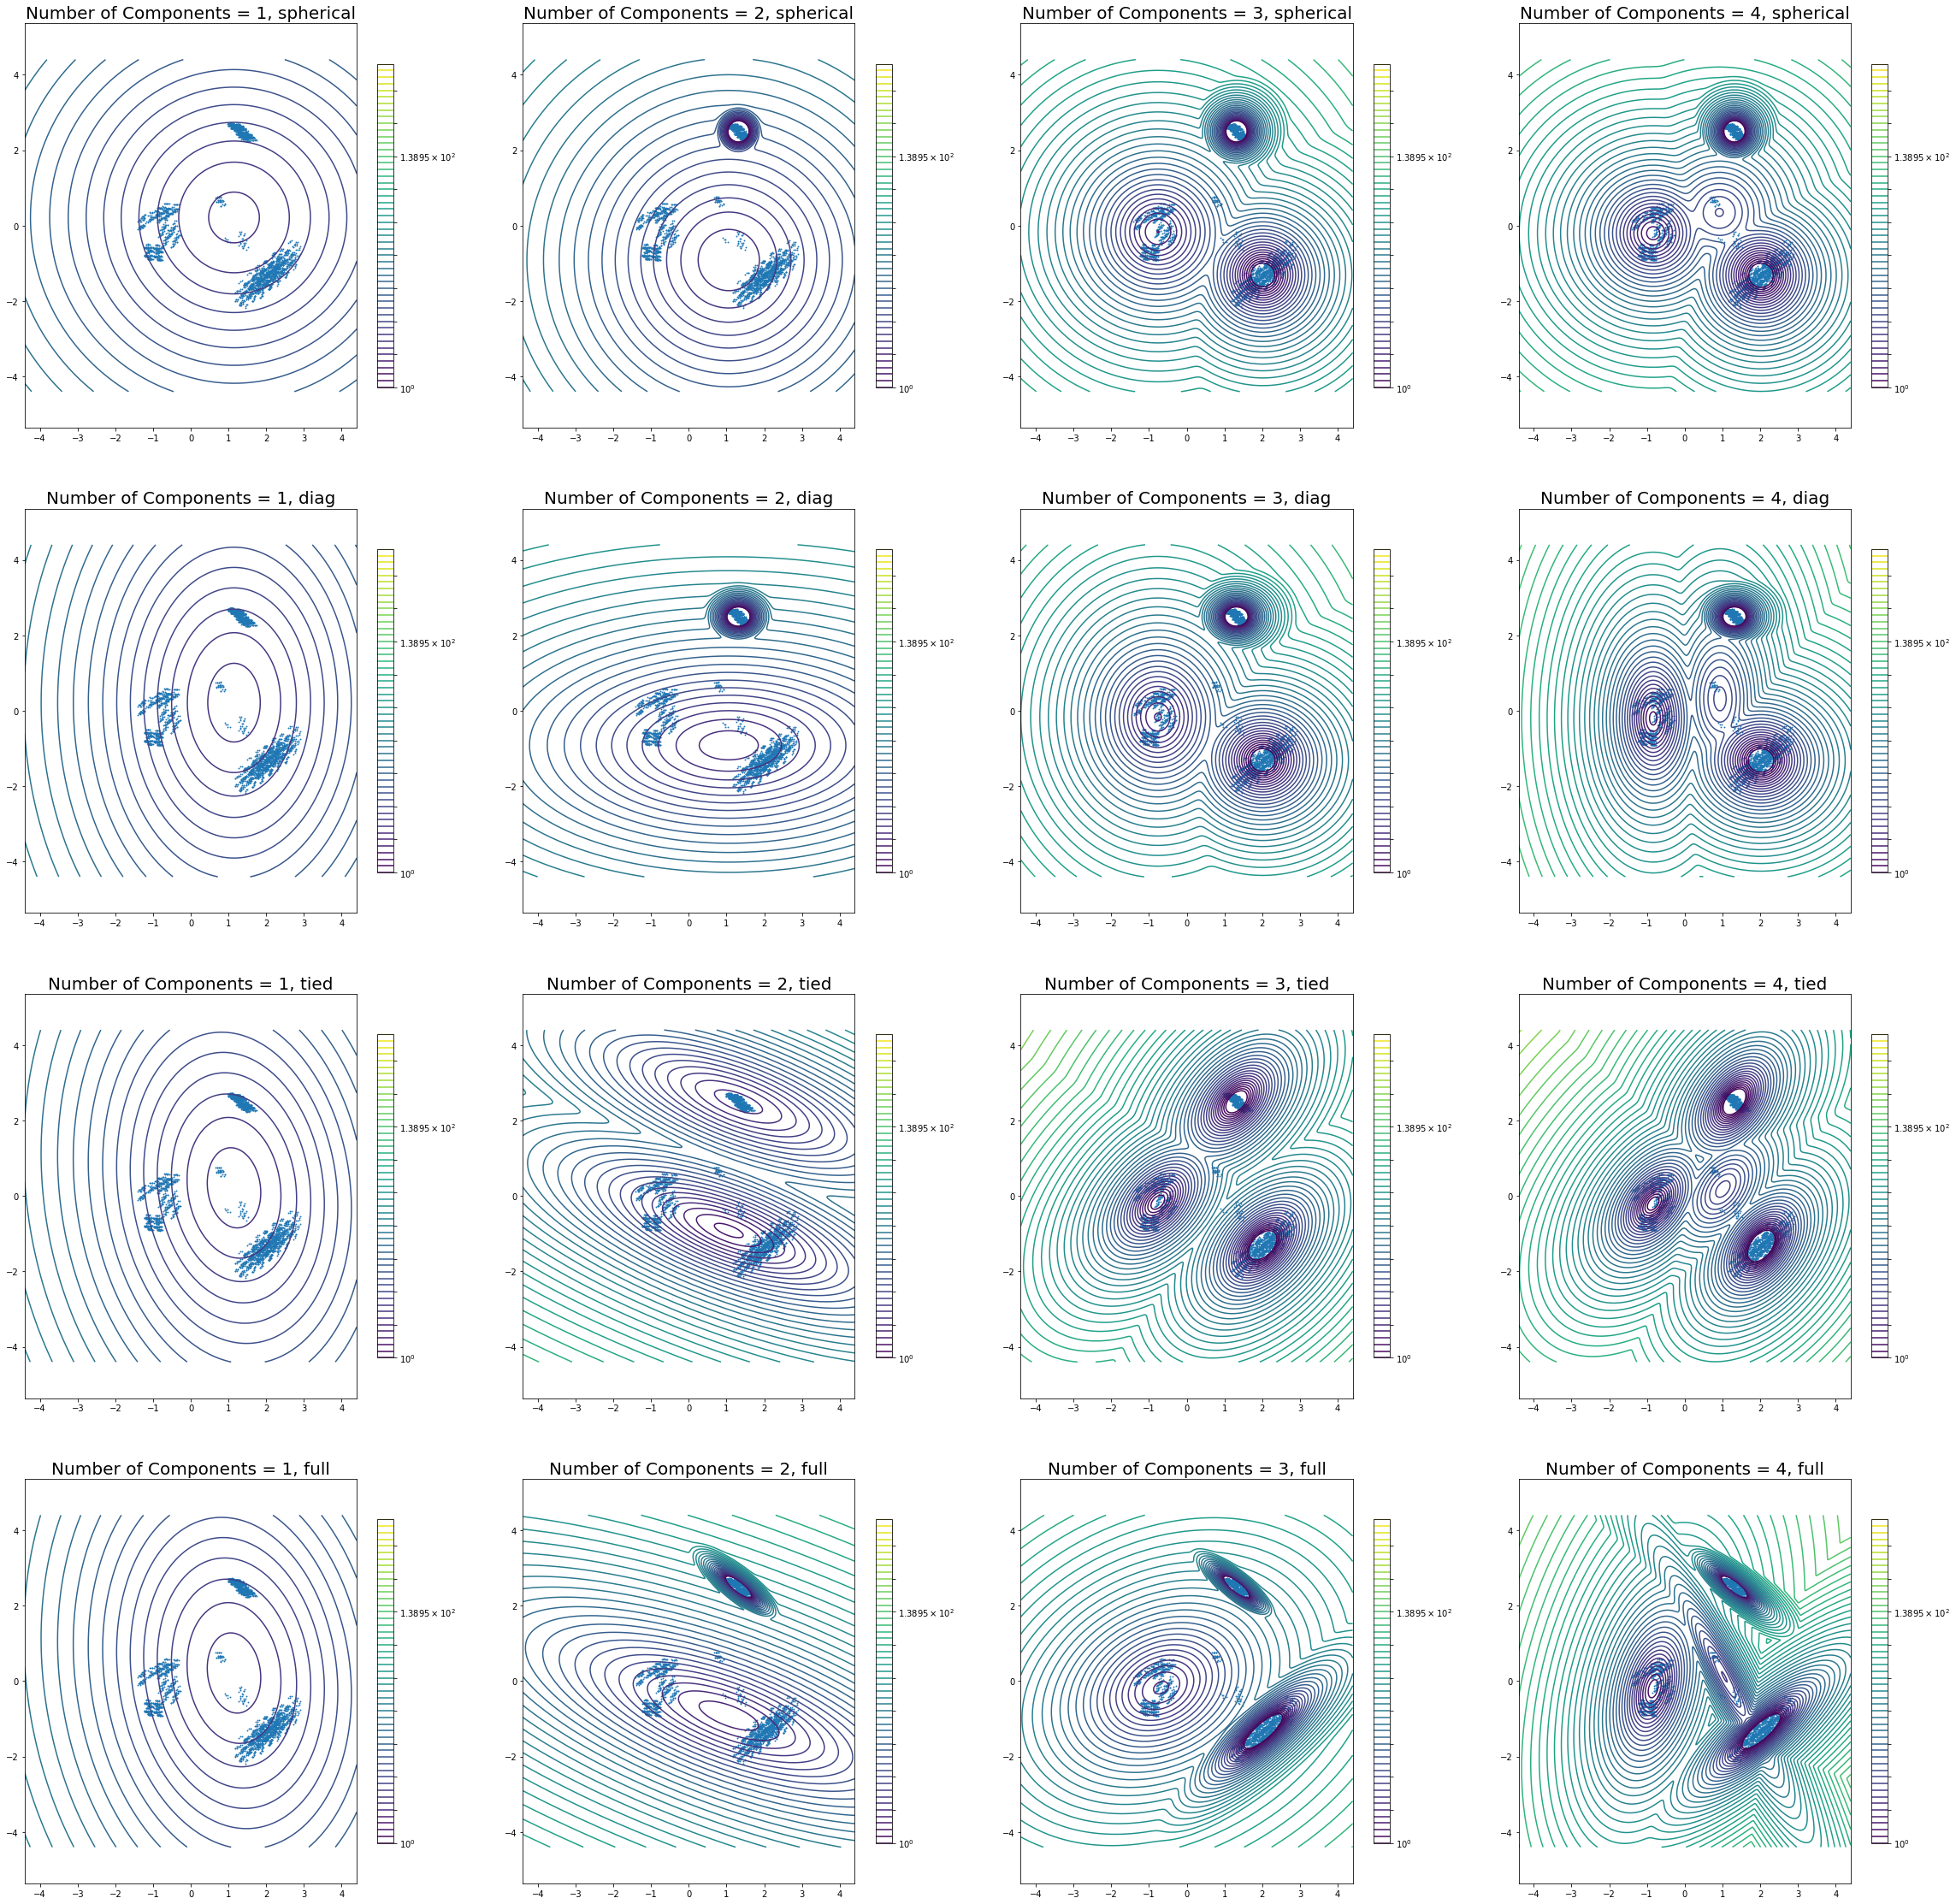

In [7]:
def P4():
### STUDENT START ###
    cov_matrix_type = ['spherical', 'diag', 'tied', 'full']
    
    plt.figure(figsize=(40, 40))

    #subplot position counter
    i = 1
    
    #creating a rectangular mesh to be used in all subplots
    x = np.linspace(-4.4, 4.4, 1000)
    y = np.linspace(-4.4, 4.4, 1000)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    
    for cmt in cov_matrix_type:
        for n in range(1,5):
            
            #all plots will lay on 4x4 grid
            plt.subplot(4, 4, i)
            #set axis limits so plots are square.  
            plt.xlim(-4.4, 4.4)
            plt.ylim(-4.4, 4.4)
            plt.axis('equal')
            #apply meaningful title to each subplot
            plt.title("Number of Components = "+str(n)+", "+cmt, fontsize=20)
            
            #fit GMM with 1-4 components and using one of 4 different covariance matrix types
            #loop will iterate 16 times, so all covariance matrix types with 1-4 compoonents will be displayed
            gmm = GaussianMixture(n_components=n, covariance_type=cmt, random_state = 1)
            gmm.fit(train_2D[train_labels==1])

            # display probabilities predicted by the model as a contour plot 
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)
            # Increased the number of contour lines to 50
            CS=plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                             levels=np.logspace(0, 3, 50))
            plt.colorbar(CS, shrink=0.8, extend='both')
            plt.scatter(train_2D[train_labels==1][:, 0], train_2D[train_labels==1][:, 1], .8)

            #increase subplot position counter each loop iteration
            i+=1
            
### STUDENT END ###

P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [8]:
def P5(cmt, c, n):
### STUDENT START ###
        
        # to make function in #5 reusable, I allow PCA components, GMM components and covariance matrix type to vary
        # project train data to c components
        pca_mod = PCA(n_components = c)
        pca_mod.fit(train_data)
        
        #transform both train and test data
        transformed_train = pca_mod.transform(train_data) 
        transformed_test = pca_mod.transform(test_data)
        
        #fit GMM model on only positive examples defined by train_labels = 1
        gmm_pos = GaussianMixture(n_components=n, covariance_type=cmt, random_state = 0)
        gmm_pos.fit(transformed_train[train_labels==1])
        
        #fit GMM model on only negative examples defined by train_labels = 0
        gmm_neg = GaussianMixture(n_components=n, covariance_type=cmt, random_state = 0)
        gmm_neg.fit(transformed_train[train_labels==0])
        
        #predicted labels are created based on which model, gmm_pos or gmm_neg scores the test data higher
        #if model from negative train data scores the test data higher, the predicted label is a 0
        #if model from positive train data scores the test data higher, the predicted label is a 1
        predicted_labels = np.zeros(transformed_test.shape[0])
        pos_probs = gmm_pos.score_samples(transformed_test)
        neg_probs = gmm_neg.score_samples(transformed_test)
        predicted_labels[pos_probs>neg_probs] = 1
        
        accuracy = np.sum(predicted_labels == test_labels)/test_labels.size
        return accuracy
    
#for specific question, find accuracy for 2-D data and 4 GMM components, with "full" covariance matrix type. 
P5('full', 2, 4)

### STUDENT END ###

0.9501779359430605

ANSWER: The accuracy achieved by full covariance matrix type, 2 PCA components, and 4 GMM components is 95%. 


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [9]:
import math

def P6():
### STUDENT START ###

    #first create a list of all possible PCA components.  
    #Given max parameters as 50, the max PCA component is 24 for a tied covariance matrix type given by:
    ##((24 mean vectors + 1 covariance matrix)x 1 GMM component) x 2 classes = 50 parameters
    #This logic is following the GaussianMixture documentation, 
    ##which states that components of a tied covariance type share the same covariance matrix.
    pca_components = [i for i in range(2, 25)]
    
    #stating covariance matrix types
    cov_matrix_type = ['spherical', 'diag', 'tied', 'full']
    
    #results list will be used to store and print results later
    results = []
    
    #loop through all 4 covariance matrix trypes
    for cmt in cov_matrix_type:
        
        #loop through all possible PCA component numbers
        for c in pca_components:
            
            #setting the number of covariance matrices that are counted as parameters.
            #following the documentation, the number of covariance matrix parameters is equal to the number of PCA components
            #except in the case of "tied" covariance matrix type, in which case the number of covariance matrix parameters is 1
            if cmt == 'tied':
                num_cov_matrix = 1
            else:
                num_cov_matrix = c
                
            #using the 50 parameters limit, calculate the maximum number of GMM components allowed. 
            max_GMM_components = math.floor(50/2/(c+num_cov_matrix))   
            
            #only if the maximum number of GMM components is 0
            if max_GMM_components > 0:
                #loop through all allowed GMM component numbers, from 1 to max allowed
                for n in range(1, max_GMM_components+1):
                    
                    #using the function from #5 that predicts labels based on the better score 
                    #out of 2 gmm models, one fit to positive data examples and one fit to negative data examples
                    #find accuracy for a particular covariance matrix type, number of PCA components, number of GMM components
                    accuracy = P5(cmt, c, n)
                    #include parameters count based on the equation above for error checking
                    parameters = (c+num_cov_matrix)*n*2
                    results.append([cmt, c, n, parameters, accuracy])
    
    results_t = pd.DataFrame(results)         
    results_t.columns = ["Covariance Matrix Type", "Principle Components", "GMM Components", "Parameters", "Accuracy"]
    return results_t

#store all experiment results in Dataframe.
all_experiments = P6().sort_values(by = 'Accuracy', ascending = False)

In [10]:
#display top 50 of all experiment results their relevant parameters
#experiments in the table are sorted by accuracy in descending order
all_experiments.head(50)

Covariance Matrix Type  Principle Components  GMM Components  Parameters  \
93                    tied                    22               1          46   
95                    tied                    24               1          50   
94                    tied                    23               1          48   
92                    tied                    21               1          44   
82                    tied                    11               2          48   
91                    tied                    20               1          42   
68                    tied                     5               4          48   
90                    tied                    19               1          40   
71                    tied                     6               3          42   
74                    tied                     7               3          48   
89                    tied                    18               1          38   
67                    tied                     5               3          36   
88                    tied                    17               1          36   
87                    tied                    16               1          34   
62                    tied                     4               3          30   
80                    tied                    10               2          44   
86                    tied                    15               1          32   
85                    tied                    14               1          30   
73                    tied                     7               2          32   
78                    tied                     9               2          40   
110                   full                     5               2          40   
72                    tied                     7               1          16   
113                   full                     7               1          28   
84                    tied                    13               1          28   
117                   full                    11               1          44   
81                    tied                    11               1          24   
115                   full                     9               1          36   
77                    tied                     9               1          20   
76                    tied                     8               2          36   
75                    tied                     8               1          18   
118                   full                    12               1          48   
83                    tied                    12               1          26   
114                   full                     8               1          32   
66                    tied                     5               2          24   
63                    tied                     4               4          40   
9                spherical                     3               4          48   
105                   full                     3               4          48   
79                    tied                    10               1          22   
116                   full                    10               1          40   
70                    tied                     6               2          28   
64                    tied                     4               5          50   
32                    diag                     3               4          48   
112                   full                     6               2          48   
111                   full                     6               1          24   
69                    tied                     6               1          14   
53                    tied                     2               8          48   
99                    full                     2               4          32   
57                    tied                     3               4          32   
101                   full                     2               6          48   
100 

In [11]:
#check that no experiment exceeded parameter limit:
print("Highest number of parameters for any experiment:", np.amax(all_experiments['Parameters']))

#find the total number of experiments ran:
print("Total number of experiments:", all_experiments.shape[0])

#find row with highest accuracy:
all_experiments[all_experiments['Accuracy'] == np.amax(all_experiments['Accuracy'])]

### STUDENT END ###

Highest number of parameters for any experiment: 50
Total number of experiments: 119


Covariance Matrix Type  Principle Components  GMM Components  Parameters  \
93                   tied                    22               1          46   

    Accuracy  
93  0.992883

Answer: The highest accuracy out of 119 possible experiments with 50 parameter limit is 99.3%.  To achive this accuracy the total parameters needed is 46, from having 22 PCA components, 1 GMM component and a "tied" covariance matrix type.  